<font size=5 color='red'>认识数据</font>

## 数据的基本统计描述

### 【例3-2】利用pandas统计中位数、均值和众数。

In [1]:
import pandas as pd
df = pd.DataFrame([[1, 2], [7, -4],[3, 9], [4, -4],[1,3]],
columns=['one', 'two'])
display(df)
print('中位数：\n',df.median())
print('均值：\n',df.mean(axis=1))
print('众数：\n',df.mode())
print('中列数：\n',(df.max()+df.min())/2)


,one,two
0,1,2
1,7,-4
2,3,9
3,4,-4
4,1,3


中位数：
 one    3.0
two    2.0
dtype: float64
均值：
 0    1.5
1    1.5
2    6.0
3    0.0
4    2.0
dtype: float64
众数：
    one  two
0    1   -4
中列数：
 one    4.0
two    2.5
dtype: float64


### 【例3-3】统计数据的分位数等统计量。
度量离散度

In [2]:
import pandas as pd
df = pd.DataFrame([[1, 2], [7, -4],[3, 9], [3, -4]],
    index=['a', 'b', 'c', 'd'],columns=['one', 'two'])
display(df)
df.describe()


,one,two
a,1,2
b,7,-4
c,3,9
d,3,-4


,one,two
count,4.000000,4.000000
mean,3.500000,0.750000
std,2.516611,6.184658
min,1.000000,-4.000000
25%,2.500000,-4.000000
50%,3.000000,-1.000000
75%,4.000000,3.750000
max,7.000000,9.000000


### 【例3-4】利用matplotlib绘制箱线图。
通过图形观察离散度
五数概括：min,max,Q1,Q2,Q3

          A         B         C         D
0  0.435995  0.025926  0.549662  0.435322
1  0.420368  0.330335  0.204649  0.619271
2  0.299655  0.266827  0.621134  0.529142
3  0.134580  0.513578  0.184440  0.785335
4  0.853975  0.494237  0.846561  0.079645


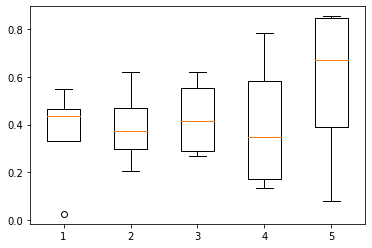

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(2)  #设置随机种子
df = pd.DataFrame(np.random.rand(5,4),columns = ['A', 'B', 'C', 'D'])  #生成0-1之间的5*4维度数据并存入4列DataFrame中
print(df)
plt.boxplot(df) 
plt.show()


## 数据可视化

### 【例3-5】python绘制散点图示例。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Setting a circle marker using `(..., 3)` is deprecated since Matplotlib 3.0, and support for it will be removed in 3.2.  Directly pass 'o' instead.
  del sys.path[0]


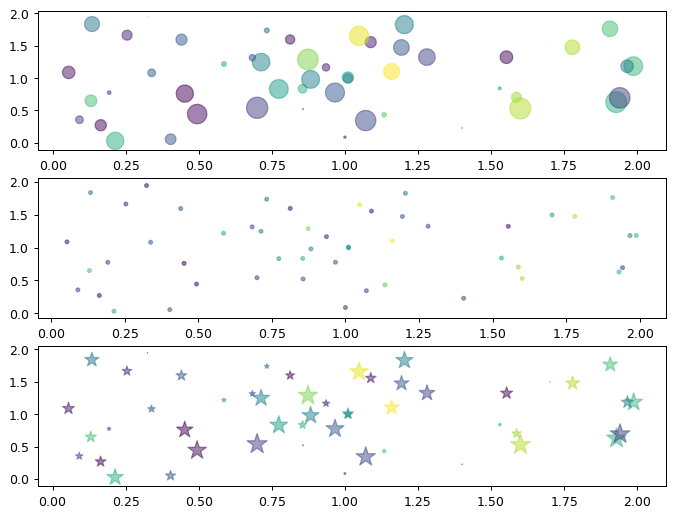

In [4]:
import matplotlib.pyplot as plt
import numpy as np
n = 50
# 随机产生50个0~2之间的x,y坐标
x = np.random.rand(n)*2
y = np.random.rand(n)*2
colors = np.random.rand(n) 
# 随机产生50个0~1之间的颜色值
area = np.pi * (10 * np.random.rand(n))**2 
# 点的半径范围:0~10
fig=plt.figure(figsize=(9,7),dpi=90)
ax1=fig.add_subplot(3,1,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, marker=(9, 3, 30))
ax2=fig.add_subplot(3,1,2)
plt.scatter(x, y, s=9, c=colors, alpha=0.5)
ax3=fig.add_subplot(3,1,3)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, marker='*')
plt.show()


### 【例3-6】Python绘制散点图矩阵示例。
注意确保seaborn-data文件在系统用户盘  https://blog.csdn.net/qq_43539664/article/details/110881432

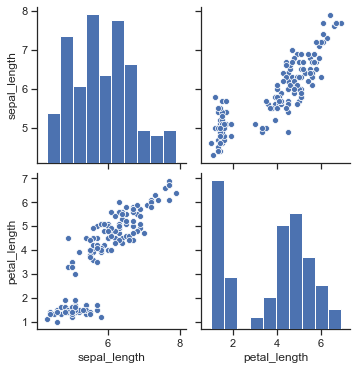

In [5]:
import seaborn as sns
df_iris = sns.load_dataset('iris')
sns.set(style = "ticks")  
#sns.set(style = "darkgrid")
g = sns.pairplot(df_iris,vars = ['sepal_length', 'petal_length'])


【例3-7】Python绘制平行坐标图示例。

In [6]:
pip install pyecharts

Looking in indexes: https://pypi.doubanio.com/simple/
Note: you may need to restart the kernel to use updated packages.


In [7]:
from pyecharts.charts import Parallel
import pyecharts.options as opts
import seaborn as sns
import numpy as np
data = sns.load_dataset('iris')
data_1 = np.array(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]).tolist()
parallel_axis = [
    {"dim": 0, "name": "萼片长度"},
    {"dim": 1, "name": "萼片宽度"},
    {"dim": 2, "name": "花瓣长度"},
    {"dim": 3, "name": "花瓣宽度"},
]

parallel = Parallel(init_opts=opts.InitOpts(width="600px", height="400px"))
parallel.add_schema(schema=parallel_axis)
# parallel.config(schema)
parallel.add('iris平行图',data=data_1,linestyle_opts=opts.LineStyleOpts(width=4, opacity=0.5))
parallel.render_notebook()


### 【例3-8】Python词云绘制示例。

In [8]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType
words = [
    ("牛肉面", 7800),("黄河", 6181),
    ("《读者》杂志", 4386), ("甜胚子", 3055),
    ("甘肃省博物馆", 2055),("莫高窟", 8067),("兰州大学", 4244),
    ("西北师范大学", 1868),("中山桥", 3484),
    ("月牙泉", 1112),("五泉山", 980),
    ("五彩丹霞", 865),("黄河母亲", 847),("崆峒山",678),
    ("羊皮筏子", 1582),("兴隆山",868),
    ("兰州交通大学", 1555),("白塔山", 2550),("五泉山", 2550)]
c = WordCloud()
c.add("", words, word_size_range=[20, 80])
c.set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例"))
c.render_notebook()


### 【例3-9】使用regplot函数绘制回归图。

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>


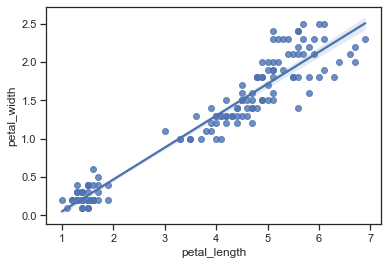

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_iris = sns.load_dataset('iris')
print(df_iris.head)
# #data=df_iris
# print(df_iris.groupby(['species'])['petal_length'].apply( np.mean)) #统计各类别的平均petal_length
# fig=plt.figure(figsize=(9,7),dpi=90)
# ax1=fig.add_subplot(2,1,1)
# sns.barplot(x = df_iris['species'],y=df_iris['petal_length'],data=df_iris)
# ax1=fig.add_subplot(2,1,2)
sns.regplot(x = 'petal_length',y = 'petal_width' ,data = df_iris)  #


## 数据对象的相似性度量

### 【例3-10】设x和y为两个向量，长度相同，求它们之间的距离 。

#### 1. 用Numpy实现常见的距离度量

In [10]:
import numpy as np
# 欧式距离（Eulidean distance）
def euclidean(x, y):
    return np.sqrt(np.sum((x-y)**2))
# 曼哈顿距离(Manhattan distance)
def manhattan(x,y):
    return np.sum(np.abs(x-y))
#切比雪夫距离(Chebyshev distance)
def chebyshev(x,y):
    return np.max(np.abs(x-y))
# 闵可夫斯基距离(Minkowski distance)
def minkowski(x,y,p):
    return np.sum(np.abs(x-y)**p)**(1/p)
# 汉明距离(Hamming distance)
def hamming(x, y):
    return np.sum(x!=y)/len(x)
# 余弦距离
def cos_similarity(x, y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))


#### 2. 使用scipy的pdist进行数据对象的距离计算
scipy.spatial.distance.pdist(X,metric='euclidean',\*arg,\**kwargs)

    X：ndarray 
    An m by n array of m original observations in an n-dimensional space.

    metric：str or function, optional
    The distance metric to use. The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.

返回
    Y：ndarray
    Returns a condensed distance matrix Y. For each i and j (where i<j<m),where m is the number of original observations. The metric dist(u=X[i], v=X[j]) is computed and stored in entry ij.
————————————————
版权声明：本文为CSDN博主「我从崖边跌落」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/qq_20135597/article/details/94212816


In [11]:
import numpy as np
from scipy.spatial.distance import pdist
x=(0.7,0.9,0.2,0.3,0.8,0.4,0.6,0,0.5)
y=(0.6,0.8,0.5,0.4,0.3,0.5,0.7,0.2,0.6)

X=np.vstack([x,y]) #按垂直方向（行顺序）堆叠数组构成一个新的数组
print(X)
d1= pdist(X, 'euclidean')
print('欧式距离：',d1)

d2=pdist(X,'cityblock')
print('曼哈顿距离：',d2)

d3=pdist(X,'chebyshev')
print('切比雪夫距离：',d3)

d4=pdist(X,'minkowski',p=2)
print('闵可夫斯基距离：',d4)

d5=pdist(X,'cosine')
print('余弦相似性：',1-d5) 


[[0.7 0.9 0.2 0.3 0.8 0.4 0.6 0.  0.5]
 [0.6 0.8 0.5 0.4 0.3 0.5 0.7 0.2 0.6]]
欧式距离： [0.66332496]
曼哈顿距离： [1.6]
切比雪夫距离： [0.5]
闵可夫斯基距离： [0.66332496]
余弦相似性： [0.92032116]


#### 3 使用sklearn.metrics 模块实现距离计算

参考 https://scikit-learn.org.cn/view/557.html

In [7]:
import numpy as np
from sklearn.metrics import pairwise_distances
X = np.array([[0.7,0.9,0.2,0.3,0.8,0.4,0.6,0,0.5], [0.6,0.8,0.5,0.4,0.3,0.5,0.7,0.2,0.6]])
distances = pairwise_distances(X, metric='euclidean')
print('欧式距离：',distances)
distances = pairwise_distances(X, metric='manhattan')
print('欧式距离：',distances)
distances = pairwise_distances(X, metric='cosine')
print('欧式距离：',distances)


欧式距离： [[0.         0.66332496]
 [0.66332496 0.        ]]
欧式距离： [[0.  1.6]
 [1.6 0. ]]
欧式距离： [[0.         0.07967884]
 [0.07967884 0.        ]]
